In [59]:
def generateGrayarr(n):
 
    # base case
    if (n <= 0):
        return
 
    # 'arr' will store all generated codes
    arr = list()
 
    # start with one-bit pattern
    arr.append("0")
    arr.append("1")
 
    # Every iteration of this loop generates
    # 2*i codes from previously generated i codes.
    i = 2
    j = 0
    while(True):
 
        if i >= 1 << n:
            break
     
        # Enter the previously generated codes
        # again in arr[] in reverse order.
        # Nor arr[] has double number of codes.
        for j in range(i - 1, -1, -1):
            arr.append(arr[j])
 
        # append 0 to the first half
        for j in range(i):
            arr[j] = "0" + arr[j]
 
        # append 1 to the second half
        for j in range(i, 2 * i):
            arr[j] = "1" + arr[j]
        i = i << 1
 
  #  print contents of arr[]
  #  for i in range(len(arr)):
  #      print(arr[i])
    return arr
#generateGrayarr(3)

In [60]:
# this function gets an index of different digits in neighbouring Grey codes number i and i-1
# i is a number of the code
# n is a length of the code
def changedDigitInGreyCode(i,lastController,listofcodes):
   # if i>=n:
   #     return -1
    k=len(listofcodes)
    nnn=len(listofcodes[0])
    for j in range(nnn):
        if listofcodes[i%k][j] != listofcodes[(i+1)%k][j]:
            return lastController-j
           # return j

In [61]:
        
def xForGrey(digit):
    if digit >=0:
        qc.x(q[digit])
    
def xForAllQubits():
    for i in range(0,nqubits-1):
            qc.x(q[i])





In [62]:
def controlnotNew(controllersFirst,controllersLast,target):
    numOfControllers=controllersLast-controllersFirst+1
    controlOp =  XGate().control(numOfControllers, None)
    ctrlqubitsnums=[]
    for i in range(controllersFirst,controllersLast+1):
        ctrlqubitsnums.append(i)
    ctrlqubitsnums.append(target)
    qc.append(controlOp, ctrlqubitsnums) 

def controlrotateNew(angle,controllersFirst,controllersLast,target):
        qc.ry(angle/2,q[target])
        controlnotNew(controllersFirst,controllersLast,target)
        qc.ry(-angle/2,q[target])
        controlnotNew(controllersFirst,controllersLast,target) 
        
def controlNotWithoutDigit(controllersFirst,controllersLast,tar,digit):
    numOfControllers=controllersLast-controllersFirst
    controlOp =  XGate().control(numOfControllers, None)
    ctrlqubitsnums=[]
    
    for i in range(controllersFirst,digit):
            ctrlqubitsnums.append(i)
        
    
    for i in range(digit+1,controllersLast+1):
            ctrlqubitsnums.append(i)
    ctrlqubitsnums.append(tar)
    qc.append(controlOp, ctrlqubitsnums)
    

        
def controlrotateWithoutDigit(angle,controllersFirst,controllersLast,target,digit):
    qc.ry(angle/2,q[target])
    controlNotWithoutDigit(controllersFirst,controllersLast,target,digit)
    qc.ry(-angle/2,q[target])
    controlNotWithoutDigit(controllersFirst,controllersLast,target,digit)
    

In [85]:
def complexControlnot(controllersFirst,controllersLast,targetsFirst,targetsLast):
    numOfControllers=controllersLast-controllersFirst+1
    if numOfControllers>1:
        controlOp =  XGate().control(numOfControllers, None)
        ctrlqubitsnums=[]
        for i in range(controllersFirst,controllersLast+1):
            ctrlqubitsnums.append(i)

        for i in range(targetsFirst,targetsLast+1):
            ctrlqubitsnums.append(i)
            qc.append(controlOp, ctrlqubitsnums) 
            ctrlqubitsnums.pop()
    else:
        for i in range(targetsFirst,targetsLast+1):
            qc.cx(q[controllersFirst],q[i])
    

#paste X gate for the qubit by index ind of an index of an angle 
def xByIndexInGreyList(greyList,ind,k):
    
    digit=changedDigitInGreyCode(ind,lastController,greyList)
    xForGrey(digit-k)
    
    
def GreyLists(lenghts):
    listt=[]
    for i in range(lenghts+1):
        listt.append(generateGrayarr(i))
    return listt
        
    
#ind=index of the angle num 0 in angleList    
def twoPartsMethod(anglesList,target,begin, end,ind,listGreyCodes,k,lastX):
    
        
        g=len(anglesList)//2
        angles1Part=[]
        angles2Part=[]
        for i in range(g): 
            angles1Part.append(anglesList[i])
            angles2Part.append(anglesList[g+i])

        rotationVerOptimized(angles1Part,target,begin, end,ind,listGreyCodes,k,lastX)
        ind=ind+g
        rotationVerOptimized(angles2Part,target,begin, end,ind,listGreyCodes,k,lastX)
    
        
    
def pairDecomposition(anglesList,target,begin,end,ind,listGreyCodes,k):
    g=len(anglesList)
    halfAngles=[anglesList[i]/2 for i in range(g)]
    minusHalfAngles=[-halfAngles[i] for i in range(g)]
    
    digit=changedDigitInGreyCode(ind,lastController,listGreyCodes)-k
    print("controllersLast ",end)
    print("controllersFirst ",begin)
    print("digit ",digit)
   
    #digit=digit-k
   # qc.cx(q[digit],q[target])
    controlrotateNew(halfAngles[0],digit,digit,target)
    xForGrey(digit)
    #qc.cx(q[digit],q[target])
    controlrotateNew(halfAngles[1],digit,digit,target)
    xForGrey(digit)
    controlNotWithoutDigit(begin,end,digit,digit)
    
    #qc.cx(q[digit],q[target])
    controlrotateNew(minusHalfAngles[0],digit,digit,target)
    xForGrey(digit)
   # qc.cx(q[digit],q[target])
    controlrotateNew(minusHalfAngles[1],digit,digit,target)
    xForGrey(digit)
    controlNotWithoutDigit(begin,end,digit,digit)
    qc.barrier()
    controlrotateWithoutDigit(halfAngles[0]+halfAngles[1],begin,end,target,digit)
    



def inverses(begin, end, ind,listGreyCodes):
   
    
    num=end-begin
    for i in range(num):
        qc.cx(q[i+1+begin],q[i+begin])
        qc.cx(q[i+begin],q[i+1+begin])
        
        
def backInverses(begin, end, ind,listGreyCodes):
    
   # digit=changedDigitInGreyCode(ind,lastController,listGreyCodes)
    
    num=end-begin
    for i in range(num-1,-1,-1):
        qc.cx(q[i+begin],q[i+1+begin])
        qc.cx(q[i+1+begin],q[i+begin])

def inversedAnglesList(angles):
    g=len(angles)
    gg=g//2
    
    newlist=[]
    for i in range(gg):
        newlist.append(angles[i]+angles[g-i-1])
    return newlist
        
def rotationVerOptimized(anglesList,target,cirBegin, cirEnd,ind,listGreyCodes,k,lastX):
    gg=len(anglesList)
    num=cirEnd-cirBegin+1
    if gg>2:
        
        activeQubitsNum=round(math.log2(gg))
        #active part of the subcircuit
            
        endd=cirEnd
        beginn=endd-activeQubitsNum+1
        if gg>2.4*math.log2(num) or beginn==endd:
     #   if gg>1000:
            twoPartsMethod(anglesList,target,cirBegin, cirEnd,ind,listGreyCodes,k,lastX)
            
        else:
            halfAngles=[anglesList[i]/2 for i in range(gg)]
            minusHalfAngles=[-halfAngles[i] for i in range(gg)]
            
            
            
            activeQubitsNum=round(math.log2(gg))
            print("activeQubitsNum=",activeQubitsNum)
            print("cirBegin=",cirBegin)
            print("cirEnd=",cirEnd)
        #active part of the subcircuit
            digit=changedDigitInGreyCode(ind,lastController,listGreyCodes)
            begin=digit
            end=begin+activeQubitsNum-1
          #  end=cirEnd
          #  begin=end-activeQubitsNum+1
          
            twoPartsMethod(halfAngles,target, begin, end,ind,listGreyCodes,k,lastX)
            complexControlnot(cirBegin,begin-1, begin,end)
            qc.barrier()
            twoPartsMethod(minusHalfAngles,target,begin, end,ind,listGreyCodes,k,lastX)
            complexControlnot(cirBegin,begin-1, begin,end)
            qc.barrier()
            
            
            
            inverses(begin, end,ind,listGreyCodes)
            qc.barrier()
            minilistGreyCodes=generateGrayarr(activeQubitsNum-1)
            print(minilistGreyCodes)
            
            ind2=0
            lastX=(len(minilistGreyCodes)!=2)
            rotationVerOptimized(inversedAnglesList(halfAngles),target,cirBegin,cirEnd-1,ind2,minilistGreyCodes,k+1,lastX)
            qc.barrier()
            backInverses(begin, end, ind,listGreyCodes)
            qc.barrier()
            
            
            
    elif gg==2:
        #we will change this part by a decomposition of the pair of rotations
        
       
      #  controlnotNew(cirBegin,cirEnd,target)
       
      #  xByIndexInGreyList(listGreyCodes,ind,k)
      #  controlnotNew(cirBegin,cirEnd,target)
       
      #  xByIndexInGreyList(listGreyCodes,ind+1,k)
        begin=cirBegin
        end=cirEnd
       
        pairDecomposition(anglesList,target,begin,end,ind,listGreyCodes,k)
        qc.barrier()

        if lastX:  xByIndexInGreyList(listGreyCodes,ind+1,k)
        qc.barrier()
      

['00', '01', '11', '10']
True
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1


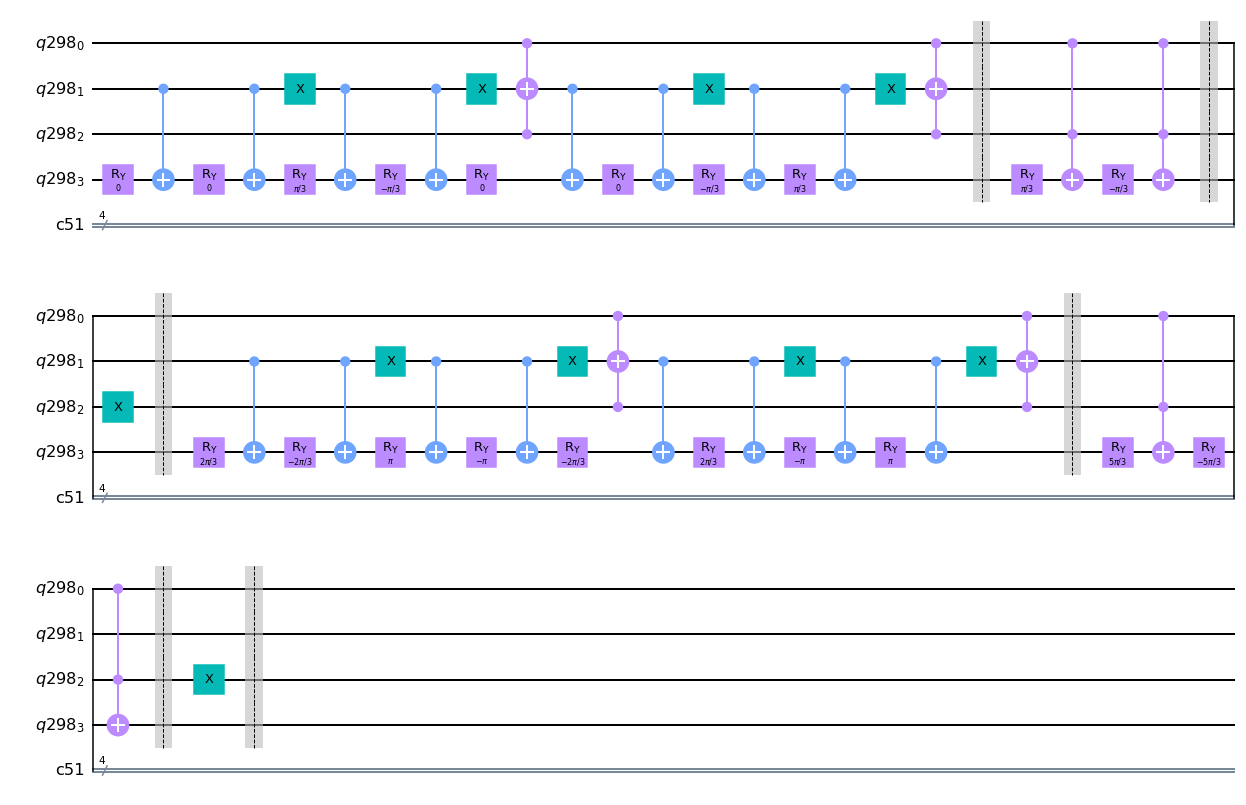

In [97]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
import math

nn=4 #how many qubits


q =  QuantumRegister(nn) 
c = ClassicalRegister(nn) 
qc = QuantumCircuit(q,c)



target=nn-1
lastController=target-1

cirBegin=0
cirEnd=lastController
ggg=2
listGreyCodesMain=generateGrayarr(ggg)
print( listGreyCodesMain)
angles=[]
p=3
 

for i in range(2**ggg):
    angles.append(2*2*pi*i/p)
ind=0
kk=0
lastX=(ggg!=1)
print(lastX)
rotationVerOptimized(angles,target,cirBegin, cirEnd,ind,listGreyCodesMain,kk,lastX)
#test1(angles,target,cirBegin, cirEnd,ind)
display(qc.draw(output="mpl")) 

In [82]:
def hadamardForAll(target):
    for i in range(target):
        qc.h(q[i])

['00', '01', '11', '10']
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
controllersLast  2
controllersFirst  0
digit  1
{'1010': 3, '0001': 16, '1101': 8, '1011': 8, '0000': 36, '0111': 11, '0110': 14, '1100': 4}
result= 0.36
computational error


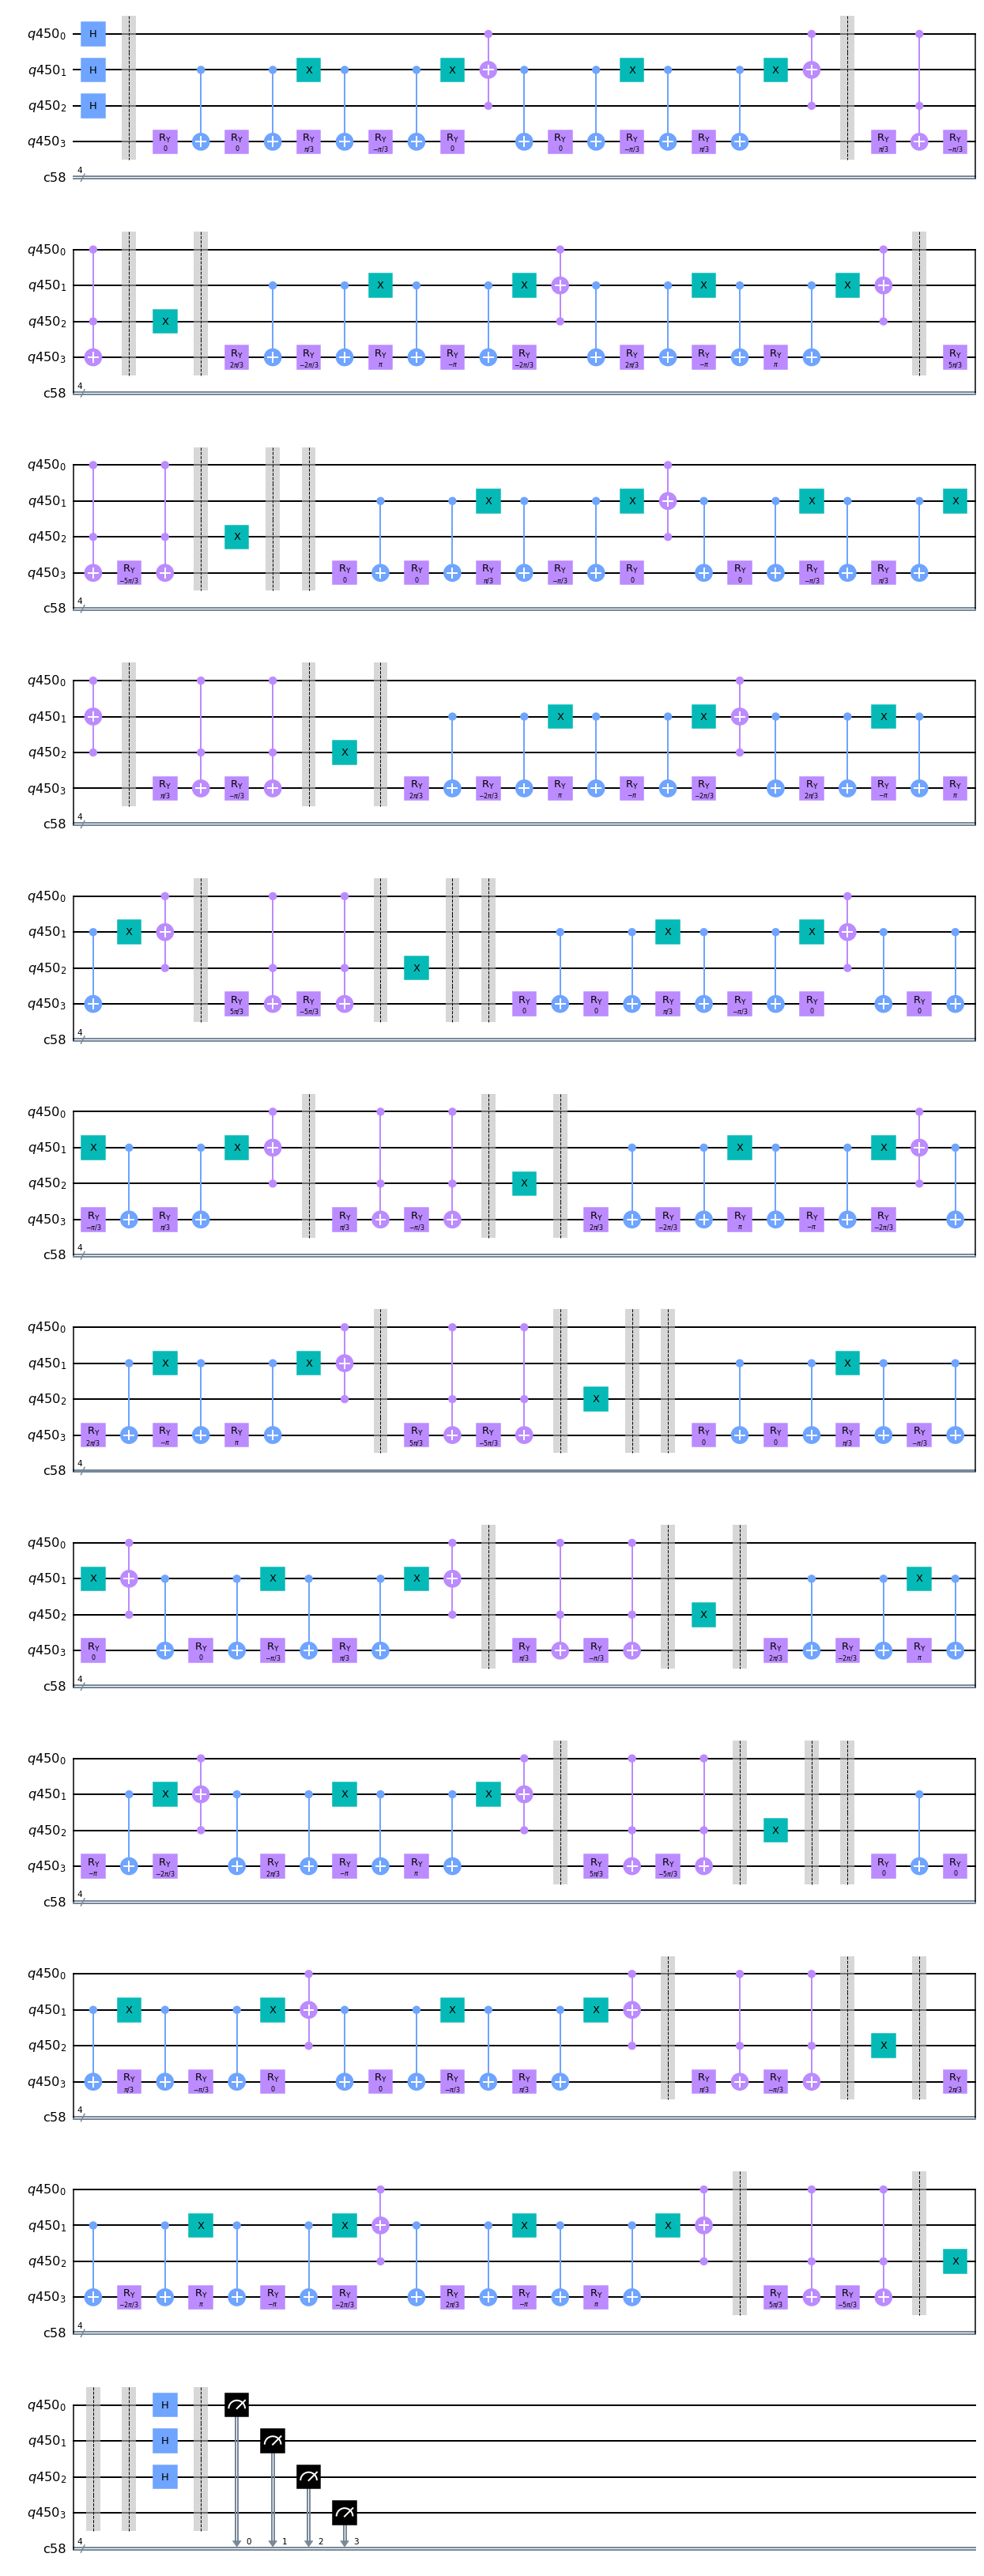

In [104]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
import math

q =  QuantumRegister(nn) 
c = ClassicalRegister(nn) 
qc = QuantumCircuit(q,c)



target=nn-1
lastController=target-1

cirBegin=0
cirEnd=lastController
ggg=2
listGreyCodesMain=generateGrayarr(ggg)
print( listGreyCodesMain)
angles=[]
p=3

eps=0.2
hadamardForAll(target)
qc.barrier()  

for i in range(2**ggg):
    angles.append(2*2*pi*i/p)
ind=0
kk=0

w=5
lastX=(ggg!=1)
for i in range (w):
 #   ccccccrotationWithGreyCodes(nqubits,angle,target)
      rotationVerOptimized(angles,target,cirBegin, cirEnd,ind,listGreyCodesMain,kk,lastX)
      qc.barrier()
#xForAllQubits()


hadamardForAll(target)
qc.barrier()
    
#qc.measure(q[target],c[target])
for cc in range(nn):
    qc.measure(q[cc],c[cc])



shotss=100
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shotss)
counts = job.result().get_counts(qc)
print(counts)
key=""
for cc in range(nn):
    key+='0'
try:
    res=counts[key]
except KeyError:
    res=0
print("result=",res/shotss)
if res/shotss>1-eps: print("w in mod")
else:
    if res/shotss<eps: 
        print("w NOT in mod")
    else: print("computational error")
display(qc.draw(output="mpl"))